### Cleaning Data

#### titanic Dataset

In [63]:
import pandas as pd

In [64]:
titanic = pd.read_csv("titanic_imp.csv")

In [65]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [66]:
titanic.tail()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN
893,0,3,male,36.0,0,0,$7.8958,S,NaN


In [67]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [68]:
titanic.describe()

,Class,SipSp,ParCh
count,894.000000,894.000000,894.000000
mean,2.309843,0.522371,0.381432
std,0.835370,1.101283,0.805171
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,8.000000,6.000000


In [69]:
titanic[["Survived", "Gender", "Age", "Fare", "Emb", "Deck"]].describe()

,Survived,Gender,Age,Fare,Emb,Deck
count,894,894,758,894,892,203
unique,4,2,92,248,3,7
top,0,male,Missing Data,$8.05,S,C
freq,551,580,41,43,647,59


In [70]:
titanic.Survived.unique()

array(['0', '1', 'yes', 'no'], dtype=object)

In [71]:
titanic.Survived.value_counts()

0      551
1      341
yes      1
no       1
Name: Survived, dtype: int64

#### 명목형 통일

In [72]:
titanic.Survived.replace(to_replace=["yes", "no"], value=[1,0], inplace=True)

In [73]:
titanic.Survived.value_counts()

0    551
1    341
1      1
0      1
Name: Survived, dtype: int64

#### 타입 변환
Fare의 달러 표시 삭제하고 숫자형으로 변환

In [74]:
titanic.Fare = titanic.Fare.str.replace("$", "")

C:\Users\skygg\AppData\Local\Temp\ipykernel_33912\4106501884.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titanic.Fare = titanic.Fare.str.replace("$", "")


In [76]:
# pd.to_numeric(titanic.Fare)
# titanic.Fare.astype("float")
titanic["Fare"] = titanic.Fare.astype("float")
titanic["Survived"] = titanic.Survived.astype("int")

In [77]:
titanic["Age"] = titanic.Age.astype("float")

ValueError: could not convert string to float: 'Missing Data'

Age칼럼은 문자와 결측치 등 데이터 유형이 혼합되어 있어서 변경할 수 없다.

In [80]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


In [81]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


#### 결측값 삭제하기

In [104]:
titanic.isna()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,True
891,False,False,False,False,False,False,False,False,True
892,False,False,False,False,False,False,False,False,True


In [105]:
titanic.isna().sum(axis=0)

Survived      0
Class         0
Gender        0
Age         136
SipSp         0
ParCh         0
Fare          0
Emb           2
Deck        691
dtype: int64

In [106]:
titanic.isna().sum(axis=1)

0      1
1      0
2      1
3      0
4      1
      ..
889    0
890    1
891    1
892    1
893    1
Length: 894, dtype: int64

In [108]:
# any는 결측값이 하나라도 있는 경우 True 반환
titanic.isna().any(axis=0)

Survived    False
Class       False
Gender      False
Age          True
SipSp       False
ParCh       False
Fare        False
Emb          True
Deck         True
dtype: bool

In [109]:
titanic.isna().any(axis=1)

0       True
1      False
2       True
3      False
4       True
       ...  
889    False
890     True
891     True
892     True
893     True
Length: 894, dtype: bool

In [112]:
# 결측값이 있는 행 보기
titanic[titanic.isna().any(axis=1)]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
2,1,3,female,26.0,0,0,7.9250,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,Missing Data,0,0,8.4583,Q,NaN
7,0,3,male,2.0,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...
888,0,3,female,NaN,1,2,23.4500,S,NaN
890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN


In [113]:
titanic.notna().sum(axis=0)

Survived    894
Class       894
Gender      894
Age         758
SipSp       894
ParCh       894
Fare        894
Emb         892
Deck        203
dtype: int64

In [114]:
titanic.notna().all(axis=0)

Survived     True
Class        True
Gender       True
Age         False
SipSp        True
ParCh        True
Fare         True
Emb         False
Deck        False
dtype: bool

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

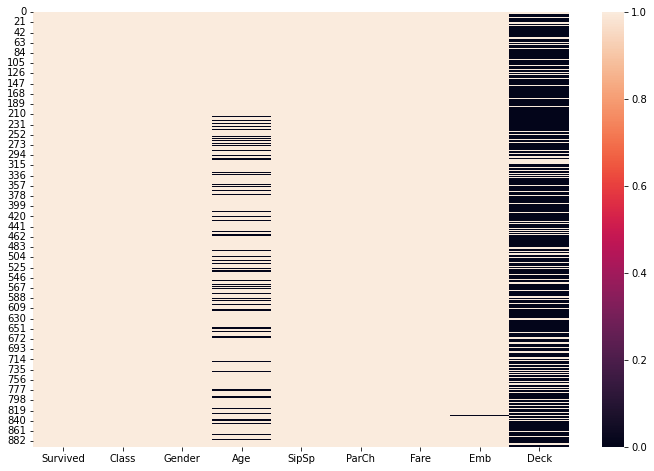

In [116]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic.notna())
plt.show()

In [118]:
titanic.Age.value_counts(dropna=False)

NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
55.5              1
66.0              1
0.92              1
23.5              1
74.0              1
Name: Age, Length: 93, dtype: int64

In [120]:
titanic.Age.replace(to_replace = "Missing Data", value = np.nan, inplace = True)

In [121]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    object 
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


In [122]:
titanic.Age = titanic.Age.astype("float")

In [126]:
titanic.Age.mean(skipna = True)

30.718507670850766

In [134]:
titanic.shape

(894, 9)

In [135]:
titanic.dropna().shape

(182, 9)

결측치가 있는 행을 단순히 제거하게 되면 이후 통계 분석이나 머신 러닝에 있어서 결과의 신뢰도가 크게 떨어진다

In [136]:
titanic.dropna(axis=0, how="any").shape

(182, 9)

In [137]:
titanic.dropna(axis=1, how="any").shape

(894, 6)

In [138]:
titanic.dropna(axis=0, how="all").shape

(894, 9)

In [139]:
titanic.dropna(axis=1, how="all").shape

(894, 9)

In [140]:
#실측값이 2개 미만이려 drop
titanic.dropna(axis=0, thresh = 8).shape

(736, 9)

In [142]:
titanic.dropna(axis=1, thresh = 500).shape

(894, 8)

In [143]:
titanic.dropna(axis=1, thresh = 500, inplace=True)

In [144]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [145]:
titanic.shape

(894, 8)

In [147]:
titanic.dropna(axis = 0, subset= ["Survived", "Class","Gender", "Age"], how = "any").shape

(717, 8)

#### 결측값 채우기 fillna()

In [150]:
titanic.Age.mean()

30.718507670850766

In [153]:
mean = round(titanic.Age.mean(),1)
mean

30.7

In [154]:
titanic.Age.fillna(mean, inplace=True)

In [155]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [156]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


#### 중복값 다루기

In [159]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


In [160]:
titanic.duplicated(keep = "first")

0      False
1      False
2      False
3      False
4      False
       ...  
889    False
890    False
891     True
892     True
893     True
Length: 894, dtype: bool

In [163]:
titanic.duplicated(keep = "first", subset = ["Survived", "Class"]).sum()

888

In [162]:
titanic[titanic.duplicated(keep = False)]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
4,0,3,male,35.0,0,0,8.0500,S
26,0,3,male,30.7,0,0,7.2250,C
28,1,3,female,30.7,0,0,7.8792,Q
29,0,3,male,30.7,0,0,7.8958,S
32,1,3,female,30.7,0,0,7.7500,Q
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S


식별자(ex.이름)가 없으므로 정확한 중복값을 찾아내기 어렵다

중복되는 행이라고 가정하고

In [169]:
titanic.drop(index=[891,892,893], inplace=True)

In [171]:
titanic.tail()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,30.7,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


#### 극단값 다루기

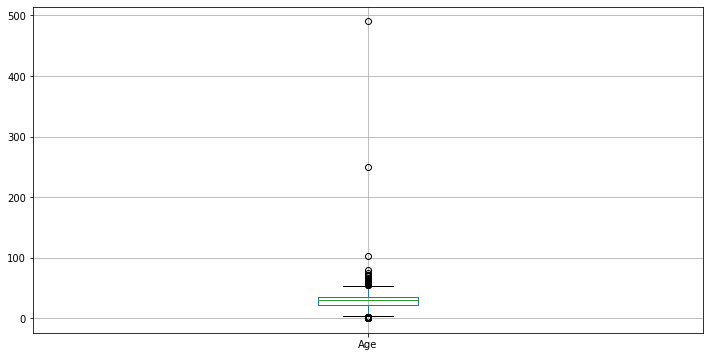

In [185]:
plt.figure(figsize = (12,6))
titanic.boxplot("Age")
plt.show()

100, 250, 500 극단값 존재

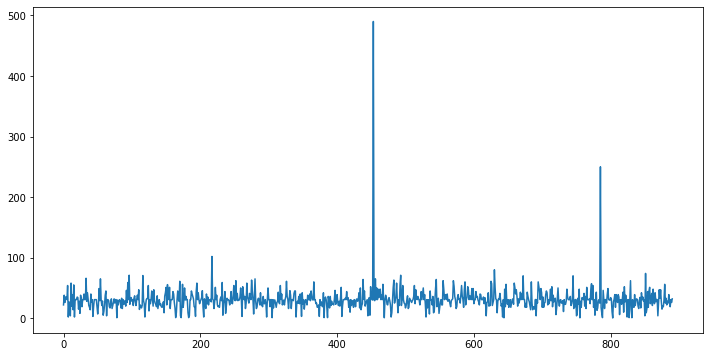

In [188]:
plt.figure(figsize = (12,6))
titanic.Age.plot()
plt.show()
#x축은 인덱스 y축은 age

In [189]:
titanic.Age.sort_values(ascending=False)

453    490.00
785    250.00
217    102.00
630     80.00
851     74.00
        ...  
831      0.83
469      0.75
644      0.75
755      0.67
803      0.42
Name: Age, Length: 891, dtype: float64

In [190]:
titanic.Fare.sort_values(ascending=False)
# 한명만 고액을 지불했다면 극단값으로 인식할 수 있지만 3명이나 했기 때문에 스위트룸으로 추정

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: Fare, Length: 891, dtype: float64

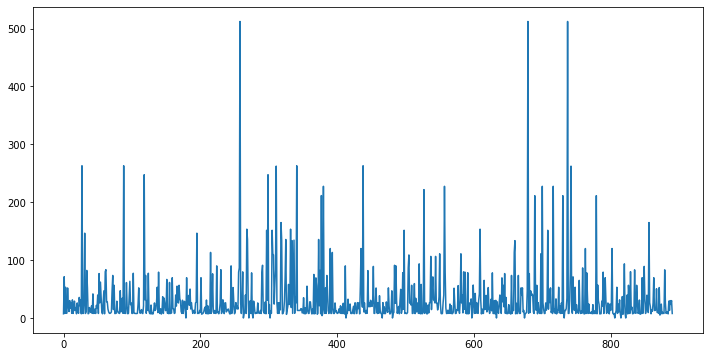

In [191]:
plt.figure(figsize = (12,6))
titanic.Fare.plot()
plt.show()

In [192]:
titanic.loc[titanic.Age > 90]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
217,0,2,male,102.0,1,0,27.0000,S
453,1,1,male,490.0,1,0,89.1042,C
785,0,3,male,250.0,0,0,7.2500,S


In [193]:
index_out1 = titanic.loc[titanic.Age > 90].index

In [194]:
index_out1

Int64Index([217, 453, 785], dtype='int64')

펫 핑거(인간이 저지르는 기기조작 실수)일 수도 있다. 소수점을 잘못 입력. 49와 25 대신에 490과 250이 입력된 것.

In [195]:
# 소수점 위치 돌려놓기
titanic.loc[titanic.Age > 90, "Age"] = titanic.loc[titanic.Age > 90, "Age"]/10

In [196]:
titanic.loc[index_out1]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
217,0,2,male,10.2,1,0,27.0000,S
453,1,1,male,49.0,1,0,89.1042,C
785,0,3,male,25.0,0,0,7.2500,S


In [197]:
titanic.loc[217,"Age"] = 42.0

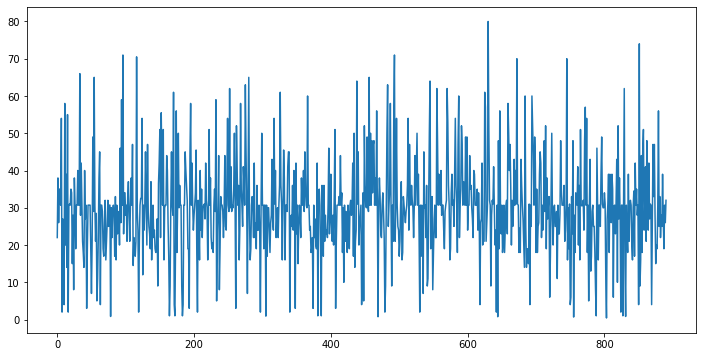

In [198]:
plt.figure(figsize = (12,6))
titanic.Age.plot()
plt.show()

#### Categorical Data

In [199]:
titanic.nunique()

Survived      2
Class         3
Gender        2
Age          89
SipSp         7
ParCh         7
Fare        248
Emb           3
dtype: int64

In [202]:
titanic[["Gender", "Emb"]].describe()

,Gender,Emb
count,891,889
unique,2,3
top,male,S
freq,577,644


In [203]:
titanic.Gender = titanic.Gender.astype("category")

In [204]:
titanic.Emb = titanic.Emb.astype("category")

In [205]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int32   
 1   Class     891 non-null    int64   
 2   Gender    891 non-null    category
 3   Age       891 non-null    float64 
 4   SipSp     891 non-null    int64   
 5   ParCh     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Emb       889 non-null    category
dtypes: category(2), float64(2), int32(1), int64(3)
memory usage: 40.4 KB


category로 바꾸면 메모리 사용량이 줄어든다!

In [206]:
titanic.Gender.dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

#### Olympic Dataset

In [21]:
summer = pd.read_csv("summer_imp.csv")

In [22]:
summer.head()

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [23]:
summer.tail()

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
31165,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31166,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31167,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31168,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31169,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [24]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


#### 칼럼명에 공백이 있으면 .으로 사용 불가

In [25]:
summer.Athlete Name

SyntaxError: invalid syntax (1837699870.py, line 1)

In [26]:
summer.rename(columns={"Athlete Name":"Athlete_Name"}, inplace=True)

In [27]:
summer.head(20)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold Medal
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold Medal


In [47]:
summer.Medal.value_counts()

Gold      10487
Bronze    10372
Silver    10311
Name: Medal, dtype: int64

In [48]:
# 명목형 통일
summer.Medal.replace(to_replace="Gold Medal", value="Gold", inplace=True)

In [49]:
summer.iloc[:, 1:].describe()

,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
count,31170,31170,31170,31170,31166,31170,31170,31170
unique,22,43,67,22761,147,2,666,3
top,London,Aquatics,Athletics,"Phelps, Michael",USA,Men,Football,Gold
freq,3567,4170,3639,22,4586,22751,1497,10487


#### 이름의 첫 글자 대문자로

summer.Athlete_Name = summer.Athlete_Name.str.title()

In [51]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [52]:
summer.loc[summer.Athlete_Name == "Hajos, Alfred"]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


왜 없다고 나올까??
--> 공백이 들어가 있음

In [53]:
summer.iloc[0,4]

'Hajos, Alfred'

In [54]:
summer.Athlete_Name.str.strip()

0                    Hajos, Alfred
1                 Herschmann, Otto
2                Drivas, Dimitrios
3               Malokinis, Ioannis
4               Chasapis, Spiridon
                   ...            
31165           Janikowski, Damian
31166    Rezaei, Ghasem Gholamreza
31167               Totrov, Rustam
31168            Aleksanyan, Artur
31169               Lidberg, Jimmy
Name: Athlete_Name, Length: 31170, dtype: object

In [56]:
# 정확히 필터링하는 대신 contain 메소드를 사용할 수 있음
summer.loc[summer.Athlete_Name.str.contains("Hajos, Alfred")]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


#### 이름에서 공백 제거

In [57]:
summer.Athlete_Name = summer.Athlete_Name.str.strip()

In [58]:
summer.loc[summer.Athlete_Name == "Hajos, Alfred"]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


In [83]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


#### 결측값 다루기

In [124]:
summer[summer.isna().any(axis = 1)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"Kudukhov, Besik",NaN,Men,Wf 60 KG,Silver


In [148]:
summer.dropna(inplace= True)

In [149]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


#### 중복값 다루기

In [164]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


In [165]:
summer.duplicated(keep="first").sum()

7

In [168]:
# 중복행 확인
summer[summer.duplicated(keep=False)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
2068,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
2069,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
12252,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
12253,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
15595,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
15596,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
16101,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
21832,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold
21833,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold


In [173]:
summer.drop(index=[2068,12253,15596,21833,28677], inplace=True)

In [174]:
summer[summer.duplicated(keep=False)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
16101,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
29784,2012,London,Badminton,Badminton,"Zhao, Yunlei",CHN,Women,Doubles,Gold
29790,2012,London,Badminton,Badminton,"Zhao, Yunlei",CHN,Women,Doubles,Gold


In [175]:
# Singh, Singh는 동명이인
summer.loc[16085:16110]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
16085,1980,Moscow,Hockey,Hockey,"Pleshakov, Sergei",URS,Men,Hockey,Bronze
16086,1980,Moscow,Hockey,Hockey,"Pleshakov, Vladimir",URS,Men,Hockey,Bronze
16087,1980,Moscow,Hockey,Hockey,"Sychev, Aleksandr",URS,Men,Hockey,Bronze
16088,1980,Moscow,Hockey,Hockey,"Zagorodnev, Oleg",URS,Men,Hockey,Bronze
16089,1980,Moscow,Hockey,Hockey,"Zigangirov, Farit",URS,Men,Hockey,Bronze
16090,1980,Moscow,Hockey,Hockey,"Allan, Schofield",IND,Men,Hockey,Gold
16091,1980,Moscow,Hockey,Hockey,"Amarjit Rana, Singh",IND,Men,Hockey,Gold
16092,1980,Moscow,Hockey,Hockey,"Baskaran, Baskaran",IND,Men,Hockey,Gold
16093,1980,Moscow,Hockey,Hockey,"Chettri, Chettri",IND,Men,Hockey,Gold
16094,1980,Moscow,Hockey,Hockey,"Deavinder, Singh",IND,Men,Hockey,Gold


In [176]:
# Zhao, Yunle선수는 서로 다른 대회에 출전에서 상을 탐
summer.loc[29780:29795]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29780,2012,London,Badminton,Badminton,"Mogensen, Carsten",DEN,Men,Doubles,Silver
29781,2012,London,Badminton,Badminton,"Chung, Jaesung",KOR,Men,Doubles,Bronze
29782,2012,London,Badminton,Badminton,"Lee, Yong Dae",KOR,Men,Doubles,Bronze
29783,2012,London,Badminton,Badminton,"Tian, Qing",CHN,Women,Doubles,Gold
29784,2012,London,Badminton,Badminton,"Zhao, Yunlei",CHN,Women,Doubles,Gold
29785,2012,London,Badminton,Badminton,"Fujii, Mizuki",JPN,Women,Doubles,Silver
29786,2012,London,Badminton,Badminton,"Kakiiwa, Reika",JPN,Women,Doubles,Silver
29787,2012,London,Badminton,Badminton,"Sorokina, Valeria",RUS,Women,Doubles,Bronze
29788,2012,London,Badminton,Badminton,"Vislova, Nina",RUS,Women,Doubles,Bronze
29789,2012,London,Badminton,Badminton,"Zhang, Nan",CHN,Men,Doubles,Gold


중복값은 무조건 삭제하는 것이 아닌 추가 정보를 확인해서 처리해야한다.

#### Categorical Data

In [209]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31161 non-null  int64 
 1   City          31161 non-null  object
 2   Sport         31161 non-null  object
 3   Discipline    31161 non-null  object
 4   Athlete_Name  31161 non-null  object
 5   Country       31161 non-null  object
 6   Gender        31161 non-null  object
 7   Event         31161 non-null  object
 8   Medal         31161 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [211]:
summer.describe(include=["O"]) #Object

,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
count,31161,31161,31161,31161,31161,31161,31161,31161
unique,22,43,67,22760,147,2,666,3
top,London,Aquatics,Athletics,"Phelps, Michael",USA,Men,Football,Gold
freq,3563,4170,3637,22,4585,22744,1497,10484


In [212]:
summer.nunique()

Year               27
City               22
Sport              43
Discipline         67
Athlete_Name    22760
Country           147
Gender              2
Event             666
Medal               3
dtype: int64

In [215]:
summer.City = summer.City.astype("category")

In [216]:
summer.Sport = summer.Sport.astype("category")

In [217]:
summer.Discipline = summer.Discipline.astype("category")

In [218]:
summer.Gender = summer.Gender.astype("category")

In [219]:
summer.Medal = summer.Medal.astype("category")

In [220]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Year          31161 non-null  int64   
 1   City          31161 non-null  category
 2   Sport         31161 non-null  category
 3   Discipline    31161 non-null  category
 4   Athlete_Name  31161 non-null  object  
 5   Country       31161 non-null  object  
 6   Gender        31161 non-null  category
 7   Event         31161 non-null  object  
 8   Medal         31161 non-null  category
dtypes: category(5), int64(1), object(3)
memory usage: 2.3+ MB


#### 결측값 다루기

In [84]:
import numpy as np

In [93]:
sales = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/sales.csv", index_col=0)

In [94]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [95]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [96]:
sales.loc["Steven", "Thu"]

nan

In [97]:
sales.iloc[1,1] = None

In [98]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15,NaN,33
Mike,45,NaN,74,87.0,12
Andi,17,33.0,54,8.0,29
Paul,87,67.0,27,45.0,7


In [100]:
sales.iloc[2,2] = np.nan

In [101]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15.0,NaN,33
Mike,45,NaN,74.0,87.0,12
Andi,17,33.0,NaN,8.0,29
Paul,87,67.0,27.0,45.0,7


In [103]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     3 non-null      float64
 2   Wed     3 non-null      float64
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(3), int64(2)
memory usage: 364.0+ bytes


In [ ]:
sales

### Detection of Duplicates

In [177]:
import pandas as pd

In [178]:
alphabet = pd.DataFrame(["a", "b", "c", "c", "d", "e", "f", "g", "g", "g"], columns = ["Alphabet"])

In [179]:
alphabet

,Alphabet
0,a
1,b
2,c
3,c
4,d
5,e
6,f
7,g
8,g
9,g


In [181]:
alphabet.drop_duplicates()
# index는 유지됨

,Alphabet
0,a
1,b
2,c
4,d
5,e
6,f
7,g


In [182]:
alphabet.drop_duplicates(ignore_index=True)

,Alphabet
0,a
1,b
2,c
3,d
4,e
5,f
6,g
